# Face Recognition (GOOGLE COLAB)

In [0]:
!nvidia-smi

Mon Jun  8 17:05:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%tensorflow_version 2.x

In [0]:
!pip install -q keras==2.3.0

     |████████████████████████████████| 378kB 5.9MB/s 


In [0]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.0


In [0]:
from keras.preprocessing import image as kimage
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# (Mount Google Drive from the menu on the left)

# Split pictures folder in train/test/val

(if not done already)

In [0]:
import sys
sys.path.insert(1, '/content/drive/My Drive/2D/')

In [0]:
import utils_2d

In [0]:
# # Creating Train / Val / Test folders (One time use)
root_dir = '/content/drive/My Drive/2D/pictures_masked_resized_heavy'
dest_dir = '/content/drive/My Drive/2D/pictures_masked_resized_heavy_split'

In [0]:
!ls "$root_dir"

alessandro  alinda  cami  gian	khaled	luca  mamma  papi


In [0]:
# utils_2d.pictures_train_test_val_split(root_dir, dest_dir, verbose=True)

# Define Train/test/val sets

In [0]:
my_pictures_dir ="/content/drive/My Drive/2D/pictures_masked_resized_heavy_split"

In [0]:
train_dir = my_pictures_dir+"/train"
val_dir = my_pictures_dir+"/val"
test_dir = my_pictures_dir+"/test"

In [0]:
!ls "$my_pictures_dir/test"

alessandro  alinda  cami  gian	khaled	luca  mamma  papi


Set the classes that the classifier should learn:

In [0]:
classes = ["alessandro", "alinda", "cami", "gian", "khaled", "mamma", "papi"]

In [0]:
color_mode = "grayscale"

## Sample from train set

The following is kept commented in case of future testing with featurewise center/std

In [0]:
# sample_processing = kimage.ImageDataGenerator()
# sample_generator = sample_processing.flow_from_directory(train_dir, classes = classes,
#                                                          # rescale= 1./255,
#                                                          target_size=(224, 224),
#                                                          color_mode=color_mode,
#                                                          batch_size=64,
#                                                          class_mode="categorical",
#                                                          shuffle=True,
#                                                          seed=1)

In [0]:
# sample = sample_generator.next()
# sample_features = sample[0]
# sample_labels = sample[1]

In [0]:
# plt.imshow(sample_features[5][:,:,0], cmap="gray")

## Generators

In [0]:
train_processing = kimage.ImageDataGenerator(
    # featurewise_center=True, # UNCOMMENT for testing with previous code
    # featurewise_std_normalization=True, # UNCOMMENT for testing with previous
    rescale= 1./255, # COMMENT for testing with previous
    # Rotations
    # rotation_range=10,
    # # Shifts
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # # Flips
    horizontal_flip=True,
    # vertical_flip=True,
    # Brightness Change
    brightness_range=[0.6,1.4],
    # Zoom Change
    # zoom_range=[0.9,1.1] # TODO: test without this
)

In [0]:
# train_processing.fit(sample_features) # UNCOMMENT for testing with previous code

In [0]:
# train_processing.mean

In [0]:
train_generator = train_processing.flow_from_directory(train_dir,
                                                       classes = classes,
                                                       target_size=(224, 224),
                                                       color_mode=color_mode,
                                                       batch_size=32,
                                                       class_mode="categorical",
                                                       shuffle=True,
                                                       seed=1)

Found 2247 images belonging to 7 classes.


In [0]:
labels_to_text = [i[0] for i in train_generator.class_indices.items()]
labels_to_text

['alessandro', 'alinda', 'cami', 'gian', 'khaled', 'mamma', 'papi']

In [0]:
test_processing = kimage.ImageDataGenerator(# featurewise_center=True,
                                            # featurewise_std_normalization=True
                                            rescale = 1./255,
                                            )
# test_processing.fit(sample_features) # UNCOMMENT for testing with previous code

val_generator = test_processing.flow_from_directory(val_dir,
                                                    classes = classes,
                                                    target_size=(224, 224),
                                                    color_mode=color_mode,
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=False,
                                                    seed=1)

test_generator = test_processing.flow_from_directory(test_dir,
                                                     classes = classes,
                                                     target_size=(224, 224),
                                                     color_mode=color_mode,
                                                     batch_size=32,
                                                     class_mode="categorical",
                                                     shuffle=False,
                                                     seed=1)

Found 644 images belonging to 7 classes.
Found 322 images belonging to 7 classes.


In [0]:
n_classes = (train_generator.num_classes)
n_classes

7

### See images

In [0]:
batch = np.array(train_generator.next()[0])

In [0]:
batch.shape

(32, 224, 224, 1)

In [0]:
# mu = train_processing.mean # UNCOMMENT for testing with previous code
# sigma = train_processing.std # UNCOMMENT for testing with previous code

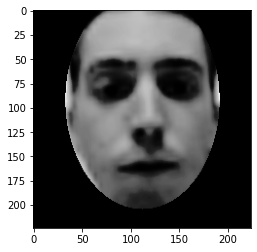

In [0]:
pic = batch[6]
# plt.imshow(((pic*sigma + mu)/255)[:,:,0], cmap="gray")
plt.imshow(pic[:,:,0], cmap="gray")
plt.show()

In [0]:
input_shape = pic.shape
input_shape

(224, 224, 1)

# Net

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))

In [0]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [0]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         restore_best_weights=True, patience=5)

In [0]:
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
 2/70 [..............................] - ETA: 22:24 - loss: 68.0473 - accuracy: 0.1562

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 59 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/70 [=>............................] - ETA: 23:14 - loss: 32.1191 - accuracy: 0.2396

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 65 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/70 [======>.......................] - ETA: 19:09 - loss: 11.9410 - accuracy: 0.3176

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 60 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/70 [=========>....................] - ETA: 16:33 - loss: 8.9956 - accuracy: 0.3871

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


70/70 [==============================] - 1700s 24s/step - loss: 3.8502 - accuracy: 0.5851 - val_loss: 0.4906 - val_accuracy: 0.8618
Epoch 2/50
70/70 [==============================] - 9s 135ms/step - loss: 0.5437 - accuracy: 0.9047 - val_loss: 0.0218 - val_accuracy: 0.9643
Epoch 3/50
70/70 [==============================] - 9s 134ms/step - loss: 0.2906 - accuracy: 0.9449 - val_loss: 4.0229e-04 - val_accuracy: 0.9845
Epoch 4/50
70/70 [==============================] - 9s 130ms/step - loss: 0.2302 - accuracy: 0.9562 - val_loss: 0.1527 - val_accuracy: 0.9472
Epoch 5/50
70/70 [==============================] - 9s 131ms/step - loss: 0.3427 - accuracy: 0.9621 - val_loss: 8.8810e-06 - val_accuracy: 0.9876
Epoch 6/50
70/70 [==============================] - 9s 132ms/step - loss: 0.2403 - accuracy: 0.9684 - val_loss: 1.8983e-05 - val_accuracy: 0.9891
Epoch 7/50
70/70 [==============================] - 9s 130ms/step - loss: 0.2478 - accuracy: 0.9774 - val_loss: 7.2895e-04 - val_accuracy: 0.9907


# Save Model

In [0]:
import os

In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])

In [0]:
model_name = latest_model_number + 1

In [0]:
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.json"
model_filename, json_filename

('/content/drive/My Drive/2D/models/21_model.h5',
 '/content/drive/My Drive/2D/models/21_model.json')

In [0]:
# mu = list(train_processing.mean[0][0])
# std = list(train_processing.std[0][0])

In [0]:
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]

d

{'class_indices': ['alessandro',
  'alinda',
  'cami',
  'gian',
  'khaled',
  'mamma',
  'papi'],
 'featurewise_center': False,
 'featurewise_std': False,
 'mask': True,
 'model_n': 21}

In [0]:
import json

In [0]:
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)

In [0]:
net.save(model_filename)

## Evaluation


In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [0]:
net.evaluate_generator(train_generator)

[0.0005563899176195264, 0.9977748394012451]

In [0]:
net.evaluate_generator(val_generator)

[0.0, 0.9860248565673828]

In [0]:
net.evaluate_generator(test_generator)

[0.0021908495109528303, 0.9906832575798035]

In [0]:
def classification_report_generator(generator):
  # should not be applied to generators with shuffle = True
  preds = net.predict_generator(generator)
  preds = np.argmax(preds, axis=1)
  real = generator.classes
  ind_dict = generator.class_indices
  num_to_label = [i[0] for i in ind_dict.items()]
  cmat = cm(real, preds)
  cr = classification_report(real, preds, target_names=num_to_label)
  return cmat, cr

In [0]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       0.99      1.00      0.99        92
      alinda       0.97      1.00      0.98        92
        cami       1.00      0.99      0.99        92
        gian       1.00      0.97      0.98        92
      khaled       0.97      0.97      0.97        92
       mamma       0.99      0.99      0.99        92
        papi       0.99      0.99      0.99        92

    accuracy                           0.99       644
   macro avg       0.99      0.99      0.99       644
weighted avg       0.99      0.99      0.99       644



In [0]:
cm_test, cr_test = classification_report_generator(test_generator)
print(cr_test)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        46
      alinda       0.98      1.00      0.99        46
        cami       1.00      0.96      0.98        46
        gian       0.98      0.98      0.98        46
      khaled       1.00      1.00      1.00        46
       mamma       0.98      1.00      0.99        46
        papi       1.00      1.00      1.00        46

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



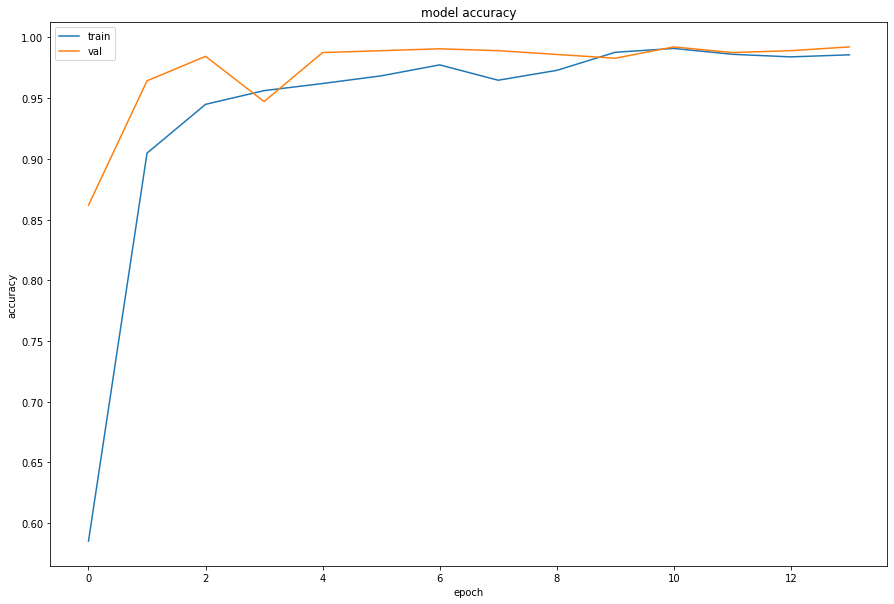

In [0]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

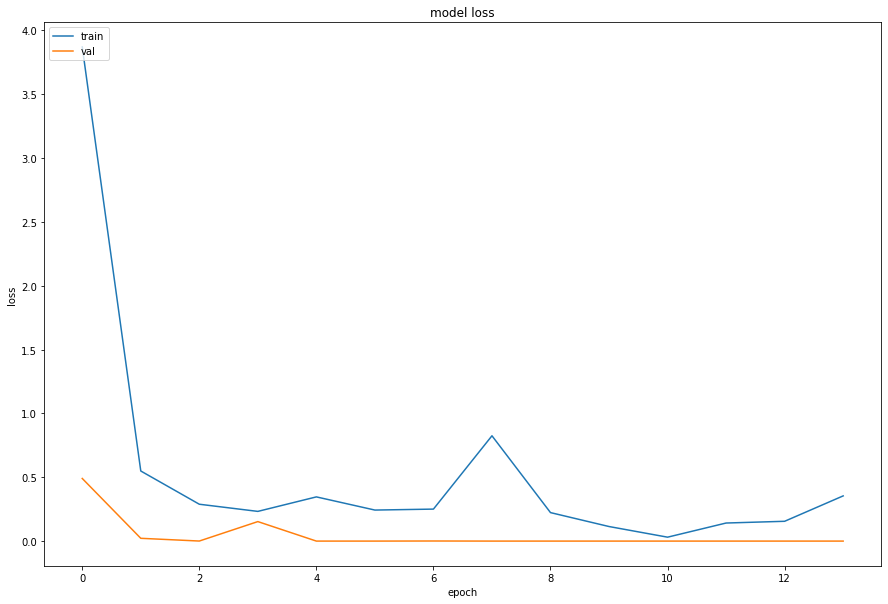

In [0]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# TODO

- Try different architectures
- Collect more data?
- look at these? 
  - https://github.com/Golbstein/keras-face-recognition
  - https://github.com/krasserm/face-recognition